<a href="https://colab.research.google.com/github/antran28/Netflix-SQL-ERD/blob/main/Google_App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [ ]:
# Importing the libraries
import pandas as pd # For storing the data in the form of dataframe
import numpy as np # Data Manipulation
from sklearn import linear_model # sklearn for linear regression
import matplotlib.pyplot as plt # Visualizing the result
import seaborn as sns # Visualizating the result

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from an excel sheet
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Analytics Group Work/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Analytics Group Work/train-2.csv")

#Data (Train + Test)
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

## Overview of Train dataset

In [ ]:
print("Train set size:", train.shape)

Train set size: (1460, 81)


In [ ]:
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
train.tail()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[5 rows x 81 columns]

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.count()
train = pd.DataFrame(train)

print(train)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

## Overview of Test dataset

In [ ]:
print("Test set size:", test.shape)

Test set size: (1459, 80)


In [ ]:
test.count()
test = pd.DataFrame(test)

print(test)

        Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]


In [ ]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
test.tail()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[5 rows x 80 columns]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test.describe()

Id   MSSubClass  ...       MoSold       YrSold
count  1459.000000  1459.000000  ...  1459.000000  1459.000000
mean   2190.000000    57.378341  ...     6.104181  2007.769705
std     421.321334    42.746880  ...     2.722432     1.301740
min    1461.000000    20.000000  ...     1.000000  2006.000000
25%    1825.500000    20.000000  ...     4.000000  2007.000000
50%    2190.000000    50.000000  ...     6.000000  2008.000000
75%    2554.500000    70.000000  ...     8.000000  2009.000000
max    2919.000000   190.000000  ...    12.000000  2010.000000

[8 rows x 37 columns]

# Checking null value in the dataset

## Train missing values

In [ ]:
print(train.isnull().any()) 
print(train.dtypes)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
#find missing values in the dataset
#show only non-zero missing values
pd.isnull(train).sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

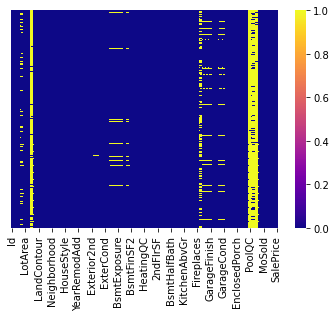

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='plasma')

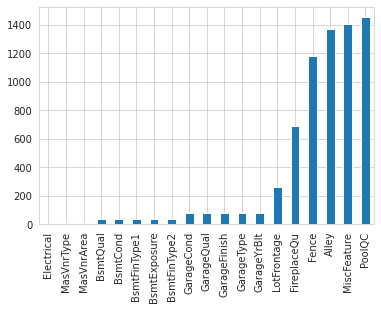

In [ ]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Among 79 variable, 19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

In [ ]:
#remove some columns with significant missing values:
train.drop(columns=['FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', "Fence", 'LotFrontage'], inplace=True)


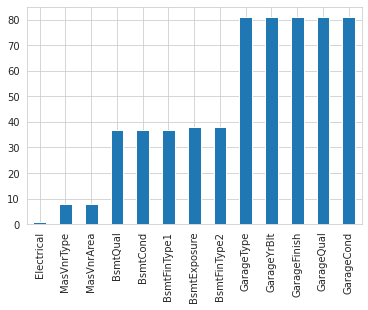

In [ ]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

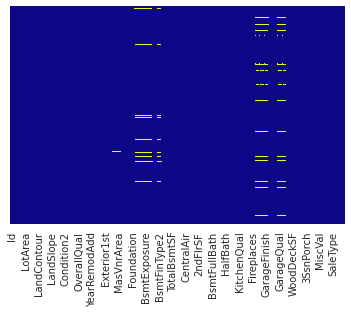

In [ ]:
#check the missing values again
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

## Test missing value

In [ ]:
print(test.isnull().any()) 
print(test.dtypes)

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
Length: 80, dtype: bool
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [ ]:
pd.isnull(test).sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

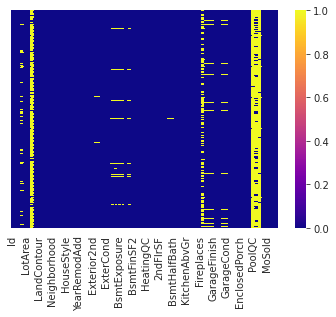

In [ ]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='plasma')

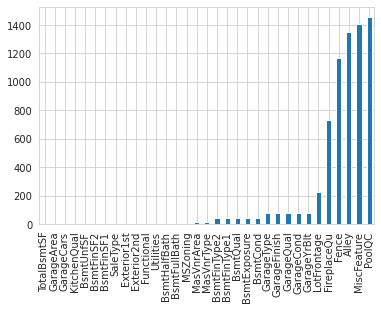

In [ ]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#remove some columns with significant missing values:
test.drop(columns=['FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', "Fence", 'LotFrontage'], inplace=True)

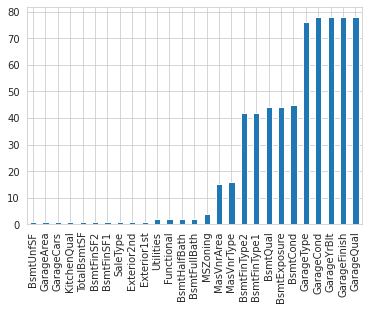

In [ ]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

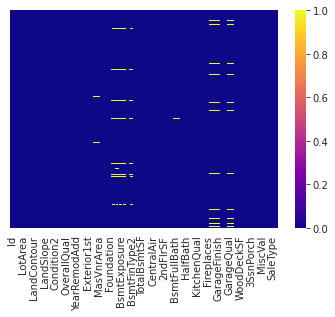

In [ ]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='plasma')

# Fill out missing value

Checking on NaN values in the dataset:
if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. So, we will try to fill in the null cell with a new category called "None".

In [ ]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

Training  Testing
Id                    0      0.0
MSSubClass            0      0.0
MSZoning              0      4.0
LotArea               0      0.0
Street                0      0.0
...                 ...      ...
MoSold                0      0.0
YrSold                0      0.0
SaleType              0      1.0
SaleCondition         0      0.0
SalePrice             0      NaN

[75 rows x 2 columns]

In [ ]:

#Based on the description data file provided, all the variables who have meaningfull NaN

meaning_null = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [ ]:
#Replacing every Nan value with "None"

for i in meaning_null:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)
    data[i].fillna("None", inplace=True)


Fill in missing values in the dataset with mean function, MasVnrType is categorical so the missing values will be replaced with "None"

In [ ]:
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)

train["MasVnrArea"].fillna(train["MasVnrArea"].mean(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].mean(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace=True)

train["MasVnrType"].fillna("None", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
data["MasVnrType"].fillna("None", inplace=True)

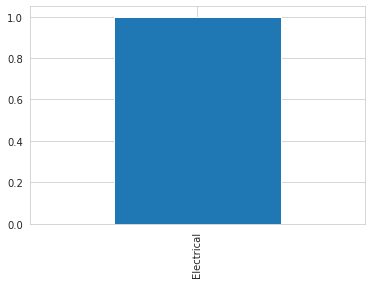

In [ ]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

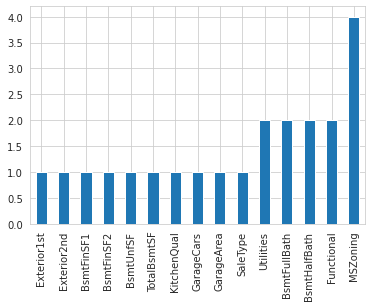

In [ ]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#Checking on the null values left
train_null_2 = pd.isnull(train).sum()
test_null_2 = pd.isnull(test).sum()

null_2 = pd.concat([train_null_2, test_null_2], axis=1, keys=["Training", "Testing"])
null_2

Training  Testing
Id                    0      0.0
MSSubClass            0      0.0
MSZoning              0      4.0
LotArea               0      0.0
Street                0      0.0
...                 ...      ...
MoSold                0      0.0
YrSold                0      0.0
SaleType              0      1.0
SaleCondition         0      0.0
SalePrice             0      NaN

[75 rows x 2 columns]

In [ ]:
null_values_2 = null_2[(null_2.sum(axis=1) > 0)]
null_values_2

Training  Testing
MSZoning             0      4.0
Utilities            0      2.0
Exterior1st          0      1.0
Exterior2nd          0      1.0
BsmtFinSF1           0      1.0
BsmtFinSF2           0      1.0
BsmtUnfSF            0      1.0
TotalBsmtSF          0      1.0
Electrical           1      0.0
BsmtFullBath         0      2.0
BsmtHalfBath         0      2.0
KitchenQual          0      1.0
Functional           0      2.0
GarageCars           0      1.0
GarageArea           0      1.0
SaleType             0      1.0

Dropping Null Values from the train dataset because there is only one null value left, deleting it will not affect the result.



In [ ]:
train = train.dropna()
print(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64


For the null values in the test dataset, we will fill out with the mean of the values for the numerical values and for categorical values we will fill it with the most common term that appear in the dataset.

In [ ]:
#Define the data category of the null values in the test dataset:
types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

Fill in numerical values:

In [ ]:
numerical_values_test = list(num_test.index)

print(numerical_values_test)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
for i in numerical_values_test:
    test[i].fillna(test[i].mean(), inplace=True)

Fill in categorical values:

In [ ]:
categorical_values_test = list(cat_test.index)

In [ ]:
fill_cat = []

for i in categorical_values_test:
    if i in list(null.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = []

for i in fill_cat:
    most_common.append(most_common_term(data[i]))
    
most_common

['RL',
 'Pave',
 'Reg',
 'Lvl',
 'AllPub',
 'Inside',
 'Gtl',
 'NAmes',
 'Norm',
 'Norm',
 '1Fam',
 '1Story',
 'Gable',
 'CompShg',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'PConc',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'GasA',
 'Ex',
 'Y',
 'SBrkr',
 'TA',
 'Typ',
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'Y',
 'WD',
 'Normal']

In [ ]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'Condition1': ['Norm'],
 'LandContour': ['Lvl'],
 'LandSlope': ['Gtl'],
 'LotConfig': ['Inside'],
 'LotShape': ['Reg'],
 'MSZoning': ['RL'],
 'Neighborhood': ['NAmes'],
 'Street': ['Pave'],
 'Utilities': ['AllPub']}

In [ ]:
k = 0
for i in fill_cat:  
    test[i].fillna(most_common[k], inplace=True)
    k += 1

In [ ]:
#Final check for missing values in the dataset
training_null_3 = pd.isnull(train).sum()
testing_null_3 = pd.isnull(test).sum()

null_3 = pd.concat([training_null_3, testing_null_3], axis=1, keys=["Training", "Testing"])
null_3[null_3.sum(axis=1) > 0]

Empty DataFrame
Columns: [Training, Testing]
Index: []

There is no missing or null values left in the dataset.



# Manipulating and Processing Data

## Convert non-numeric features to strings

In [ ]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

print(train.shape)
print(test.shape)

(1459, 75)
(1459, 74)


###Dropping unnecessary columns

In [ ]:
y_train = train["SalePrice"].copy()
x_train = train.copy().drop(columns = ["Id", "SalePrice"])
x_test = test.copy().drop(columns = ["Id"])

print(x_train.shape)
print(x_test.shape)

(1459, 73)
(1459, 73)


###Describing Training Data

In [ ]:
num_cols = x_train.select_dtypes(include=['number'])
cat_cols = x_train.select_dtypes(include=['object'])

print(f'The dataset contains {len(num_cols.columns.tolist())} numerical columns \
and {len(cat_cols.columns.tolist())} categorical columns')

The dataset contains 32 numerical columns and 41 categorical columns


Merge two dataset into one set of data

In [ ]:
df = pd.concat([train, test])

### Handling Categorical Data With Dummy Variables

In [ ]:
categorical_cols = df.select_dtypes(include=np.object).columns
df = pd.get_dummies(df, prefix=categorical_cols)
df

Id  LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0        1     8450  ...                     1                      0
1        2     9600  ...                     1                      0
2        3    11250  ...                     1                      0
3        4     9550  ...                     0                      0
4        5    14260  ...                     1                      0
...    ...      ...  ...                   ...                    ...
1454  2915     1936  ...                     1                      0
1455  2916     1894  ...                     0                      0
1456  2917    20000  ...                     0                      0
1457  2918    10441  ...                     1                      0
1458  2919     9627  ...                     1                      0

[2918 rows x 310 columns]

In [ ]:
df = df.drop(columns = ["Id"])

In [ ]:
print(df.shape)

(2918, 309)


# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

## Seperate Train data and Test data for Modeling

In [ ]:
categorical_cols = train.select_dtypes(include=np.object).columns
train = pd.get_dummies(train, prefix=categorical_cols)
train

Id  LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0        1     8450  ...                     1                      0
1        2     9600  ...                     1                      0
2        3    11250  ...                     1                      0
3        4     9550  ...                     0                      0
4        5    14260  ...                     1                      0
...    ...      ...  ...                   ...                    ...
1455  1456     7917  ...                     1                      0
1456  1457    13175  ...                     1                      0
1457  1458     9042  ...                     1                      0
1458  1459     9717  ...                     1                      0
1459  1460     9937  ...                     1                      0

[1459 rows x 309 columns]

In [ ]:
print(train.shape)

(1459, 309)


In [ ]:
y = train['SalePrice']

x = train.drop('SalePrice', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Run regression model

In [ ]:
# Treating LinearRegression as an object
lr = LinearRegression()

In [ ]:
# Fitting here meaning training the train data on test data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.78


In [ ]:
# print the intercept
print(lr.intercept_)

-1242851.1191722876


In [ ]:
print(lr.coef_)

[ 1.55958740e+00  8.89538181e-01  6.68584291e+03  6.36450405e+03
  3.76500034e+02  9.29826079e+01  2.93189401e+01  1.56576556e+01
  9.35092010e+00  6.42887740e-02  2.50728483e+01  1.74223929e+01
  3.78696824e+01 -2.03550570e+01  3.49370721e+01  2.57706240e+03
 -1.20891938e+03  5.31272808e+03  1.10337115e+03 -4.24181660e+03
 -7.29949106e+03  1.02034814e+03  1.19907484e+03  1.94384959e+01
  1.95362093e+03  2.31015767e+01  1.05834029e+01  7.10475884e+00
 -5.92585212e+00 -3.19024444e+00  1.60179884e+01  1.38398593e+02
  6.31860201e-01  2.23089905e+03  1.38079051e+04 -7.34765438e+03
  1.04775236e+02  7.73746408e+02  1.67290324e+03 -2.10932922e+03
  1.28039324e+04 -6.02606589e+03  1.04203397e+04  1.12471966e+04
 -1.17062938e+04 -4.75674478e+03 -1.72954892e+04 -3.82012045e+03
 -2.29614442e+04  1.03400028e+04  1.30676535e+03  5.61620063e+03
  5.69847544e+03 -1.68209750e+04  1.68209750e+04 -1.64691880e+03
  6.95153617e+03 -4.41747380e+03 -8.87143565e+02  7.23631771e+03
  3.48471353e+03 -1.25013

In [ ]:
pd.DataFrame(lr.coef_, x.columns, columns = ['Coeff'])

Coeff
Id                         1.559587
LotArea                    0.889538
OverallQual             6685.842915
OverallCond             6364.504054
YearBuilt                376.500034
...                             ...
SaleCondition_AdjLand  11225.663778
SaleCondition_Alloca    6660.227307
SaleCondition_Family   11213.659658
SaleCondition_Normal    4503.694449
SaleCondition_Partial -31323.424826

[308 rows x 1 columns]

In [ ]:
# Predicting the test values
predictions_1 = lr.predict(X_test) 
print(predictions_1.shape)
predictions_1

(438,)


array([172116.51587982,  84932.40347479, 101190.83473757, 140526.44457451,
       148946.78593362,  94884.19946113, 161146.69821042, 174581.52880137,
        86104.58344675, 108031.30084277, 106030.50321819, 337836.99014126,
        92928.79705809, 215349.83770703, 331867.99168458, 120846.25248668,
       177946.32397687, 406977.64055301, 281332.0775376 , 178652.28441024,
       294474.60735318,  67773.1794665 , 145471.10293175, 211758.72791561,
       183570.99469378, 186863.20728039, 159604.07733026, 296407.48471484,
        47424.13972873, 361760.24110185, 123729.35866121, 153175.21744473,
       160602.31285034, 174835.5794177 , 235251.75019059, 304328.15693403,
       153525.07971183, 191724.80925996, 109592.65339665, 106550.82149383,
        88876.12271076, 138796.98190924, 224578.42895813,  73330.41651727,
       128961.11168099, 208207.17807681, 194489.12023424, 205806.17448867,
        94576.81860289, 290699.32128331, 309969.13353999, 156057.14005164,
        75787.46751849,  

In [ ]:
predictions_2 = lr.predict(X_train)
print(predictions_2.shape)

(1021,)


In [ ]:
predictions = np.concatenate((predictions_1, predictions_2))
print(predictions.shape)

(1459,)


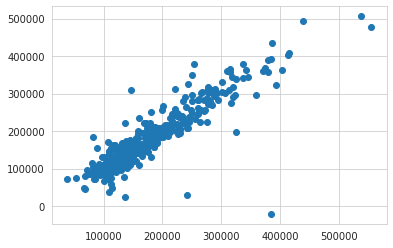

In [ ]:
# Compare the values of the predictions array with the values of y_test.
plt.scatter(y_test, predictions_1)

In [ ]:
# Checking the y_test values 
y_test 

1420    179900
494      91300
1412     90000
569     135960
486     156000
         ...  
1279     68400
895     140000
64      219500
679     128500
957     132000
Name: SalePrice, Length: 438, dtype: int64

In [ ]:
# Metrics help in determining the error rate between y_test and predictions
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test,predictions_1))  # Mean Absolute error
print("MSE", metrics.mean_squared_error(y_test,predictions_1)) # Mean Square error
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions_1))) # Root Mean Square error

MAE 20136.9874492403
MSE 1239603500.116462
RMSE 35208.00335316477


In [ ]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = test['Id']
res['SalePrice'] = predictions
res.to_csv('submission_final.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('drive')

res.to_csv('/content/drive/MyDrive/submission_final.csv', encoding='utf-8', index=False)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
